### 1. Importing Libraries Required

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings('ignore')

### 2. Loading dataset as a DataFrame

In [2]:
BankMktg_df = pd.read_csv("bank-full.csv")
BankMktg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [3]:
BankMktg_df.shape

(45211, 17)

### Objective
1. Understanding the customers' needs will result in more effective marketing strategies, smarter product designs and greater customer satisfaction.
2. Bank wants to understand their customers behaviour and want to predict their savings patterns & identiify the type of customers who are likely to go ahead for term deposits with the bank.
3. By focusing on marketing effors on those customers, bank will not only likely to secure more deposits effectively but also can reduce their focus on undesirable advertisements and gain more customer satisfaction.

### About the dataset
5. There are 45,211 total records where in bank has reached customers through the phone calls and collected certain information.
6. Each observatin has 17 features including target.
7. Each record is represented with the binary response stored in "Target" revealing response - Yes (Accept to deposit) or No (doesn't accept to deposit).
8. Data set consists of various categories of variables as explained below:
       a. Interval:
          . age : Age of the customer in years
          . balance: Average yearly balance in Euros
          . day: Last contact day of the month
          . duration: Last contact duration in seconds
          . campaign: Number of times reached out to this client in this campaign
          . pdays: Number of days passed by after reaching out to the client (999-Client was not contacted)
          . previous: Number of times reached out to this client before the campaign for this client          
       b. Categorical:
          . job: Type of the job (Eg: Admin, blue collar, entrepreneur etc.)
          . marital: Marital Status (Eg. Married, Single, Divorced et. Note: Divorced means divorced or widowed)
          . education: Level of education
          . contact: Communication type (Eg. Telephone, Cellular etc.)
          . month: last contact month of the year
          . poutcome: Outcome of the previous campaign
       c. Binary
          . default: Has credit in default?
          . housing: Has housing loan or not?
          . loan: Has personal loan or not?          
          . Target: Has the client subscribed a term deposit? This is also our target to build the prediction      model.

### 3. Cleansing the dataset

#### 3.1. Checking for missing values

In [4]:
BankMktg_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [5]:
BankMktg_df.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


There are no missing values. However, there values like 'Unknown", "Others" which are just like the missing values. Let's see how many records contain such values.

##### 3.2. Checking for 'unknown' and 'other' values

In [6]:
BankMktg_df.isin(["unknown"]).sum(axis=0)

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
Target           0
dtype: int64

In [7]:

BankMktg_df.isin(["other"]).sum(axis=0)

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome     1840
Target          0
dtype: int64

#### Observations:
1. Some of the values are 'unknown' in the features "job", "education","contact" & "poutcome".
2. However, in case of 'other' as a value only present in "poutcome".
3. We can replace value 'Unknown' with 'Other'. However, it might not differ to a great extent. Leaving the same as it is & going ahead with further EDA.

### 4. Exploratory Data Analysis & Visualization

#### 4.1. EDA:

In [8]:
BankMktg_df.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211,NaN,NaN,NaN,40.9362,10.6188,18,33,39,48,95
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211,NaN,NaN,NaN,1362.27,3044.77,-8019,72,448,1428,102127
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211,NaN,NaN,NaN,15.8064,8.32248,1,8,16,21,31


#### Observations:
1. Age: The average age of the customers is around 41 years. Age is almost normally distributed and can be seen median value 39 years almost close to mean. There seem to be outliers preseting in age and it can be seen from the max age of 95 years.
2. Job: Maximum count of job is blue-collared employees. They cover about 22% of the data provided.
3. Marital: Almost 60% of the sample constitutes married customers and the other catergories are only 40%.
4. Education: Around 51% of customers have pursued till secondary education.
5. Default: Around 98% of the customers are not in default. It shows most of the customers are paying their loans on time.
6. Balance: This is recording the annual average balance maintained by the customers. We can see the customers with negative balance as well. Data seems to be positively skewed as mean is more than the median. Looking at the maximum value hints for outliers. However, customers with maximum balances can be potential customer for term deposits.
7. Housing: Around 56% of the  customers have availed housing loan.
8. Loan: Around 16% of the customers have availed personal loan.
9. Contact: 66% of the times, customers were contacted at the cellphone.
10. Month: 30% of the customers were reached in the month of May alone. It seems May has some kind of importance. However it still on how successfull the calls were in fetching deposits.
11. Duration: Average call duration can be seen as 258 seconds slightly more than 4 minutes. We can also the maximum duration of the call is 4918 seconds (82 minutes), which is quite long. May be the customer who wants to go deposit like to collect more details resulting in long duration calls.
12. Campaign: On an average, single customer has been reached out for more than 2 times. We can see the maximum value of 63, which shows a customer has been reached out 63 times.
13. pdays: It is recording the number of passed after contacting a customer. On average, customers were not contacted atleast for 40 days. However, looking at the negative median values, seems customers were contacted more frequently. We can also see some customers were not contacted for 871 days (almost 2.5 years)
14. poutcome: Most of the observations have not recorded the outcome of the previous campaign. This might be good to record as much as possible so that bank can know the exact customers to be targeted. In the data set provided, around 82% times, customers response is unknown.
15. Data set provided is not balanced. Around 88% of the data is with negative reponse.

In [9]:
BankMktg_df.groupby("Target").count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
no,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
yes,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


#### 4.2. UniVariate Plots to understand the distribution:

In [0]:
# Set figure width to 16 and height to 12 (4:3 aspect ratio)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a81d302b0>,
      dtype=object)

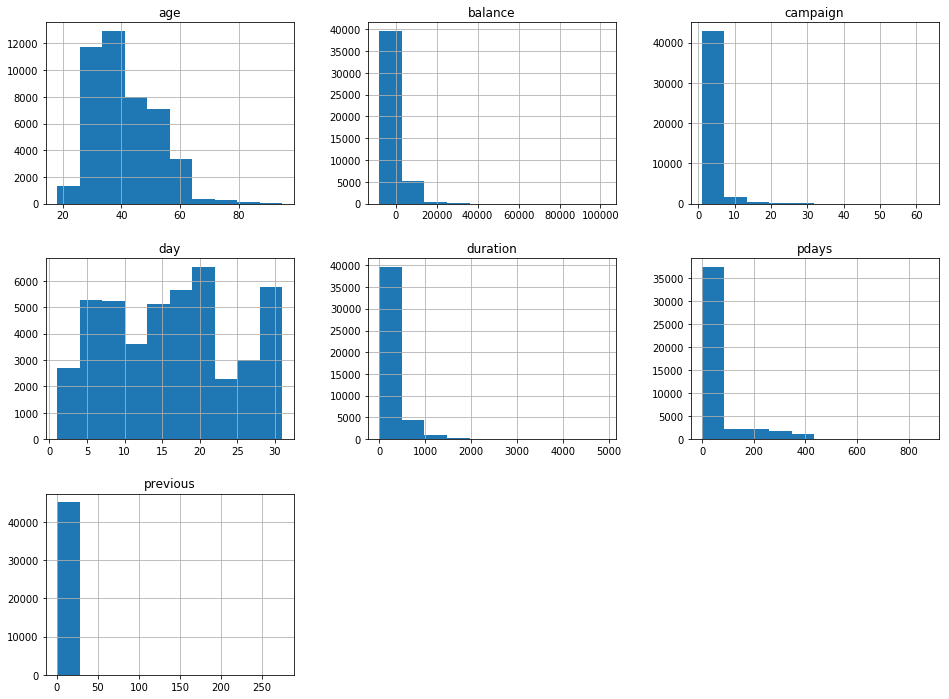

In [11]:
BankMktg_df.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5a7f15eeb8>,
      dtype=object)

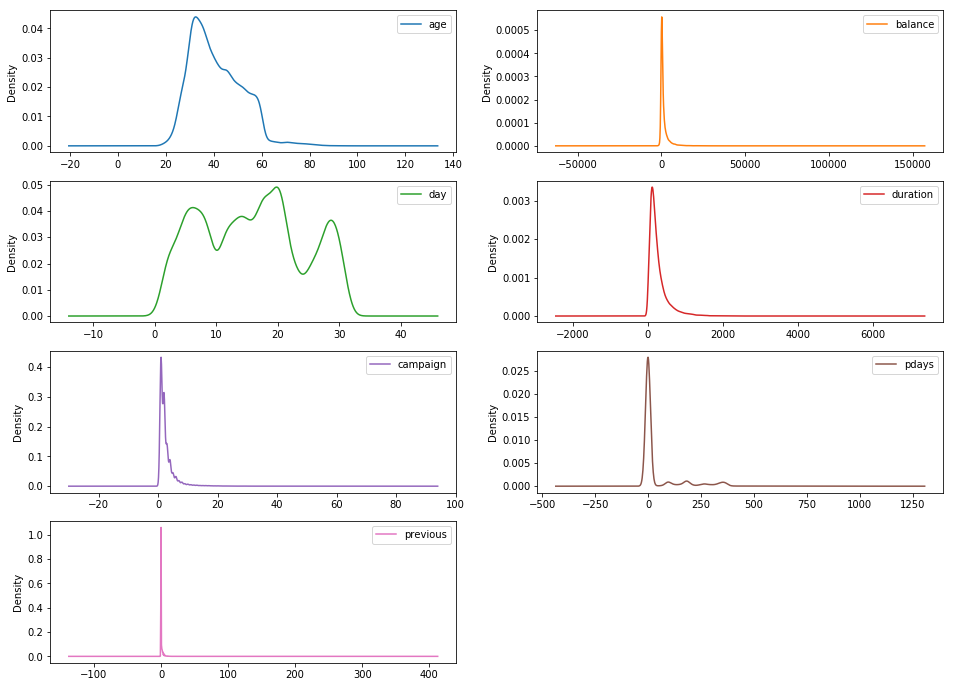

In [12]:
BankMktg_df.plot(kind='density', subplots=True, sharex=False, layout = (4,2))

age             AxesSubplot(0.125,0.71587;0.352273x0.16413)
balance      AxesSubplot(0.547727,0.71587;0.352273x0.16413)
day            AxesSubplot(0.125,0.518913;0.352273x0.16413)
duration    AxesSubplot(0.547727,0.518913;0.352273x0.16413)
campaign       AxesSubplot(0.125,0.321957;0.352273x0.16413)
pdays       AxesSubplot(0.547727,0.321957;0.352273x0.16413)
previous          AxesSubplot(0.125,0.125;0.352273x0.16413)
dtype: object

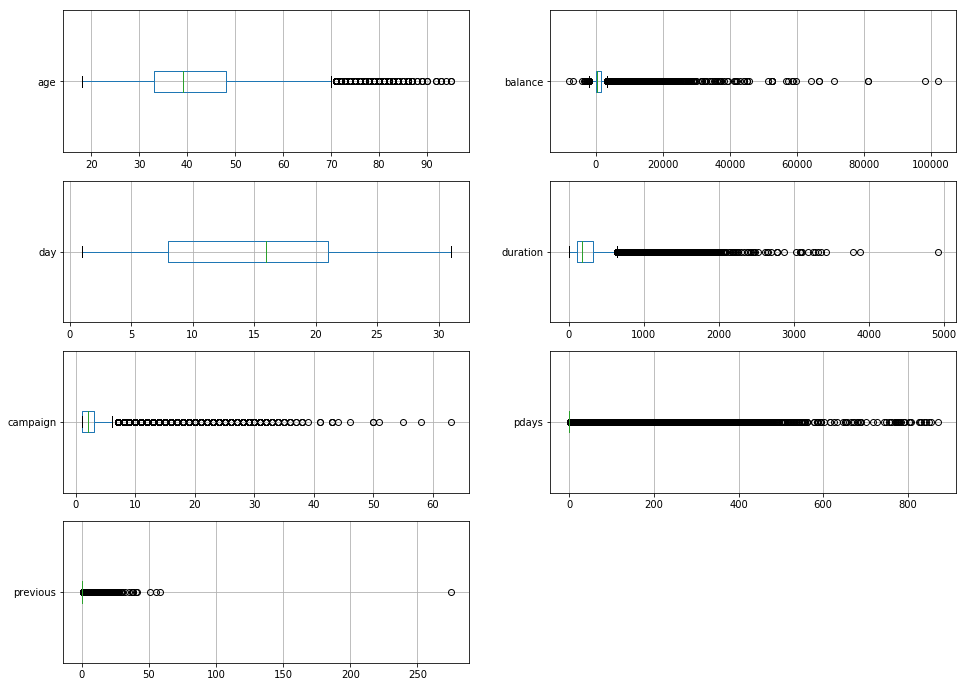

In [13]:
BankMktg_df.plot(kind = 'box', 
                 subplots = True, 
                 sharex = False, sharey =  False, 
                 layout = (4,2), vert = False, grid = True)

#### Observations:
1. Maximum customers are falling under the range of 28 & 42. There are many outlying customers falling beyond 70 years.
2. Very less customers are maintaining annual average balance beyond EUR 5000. We can see lots of outliers in annual average balance.
3. Duration of the call is < 800 seconds in majority cases. Can observer lots of outliers in duration.
4. We can see lots of outliers in case of no of times contacted during the last campaign & days passed after cotnacting the customers.

#### 4.3. Multi-Variate plots to understand relationship among the features

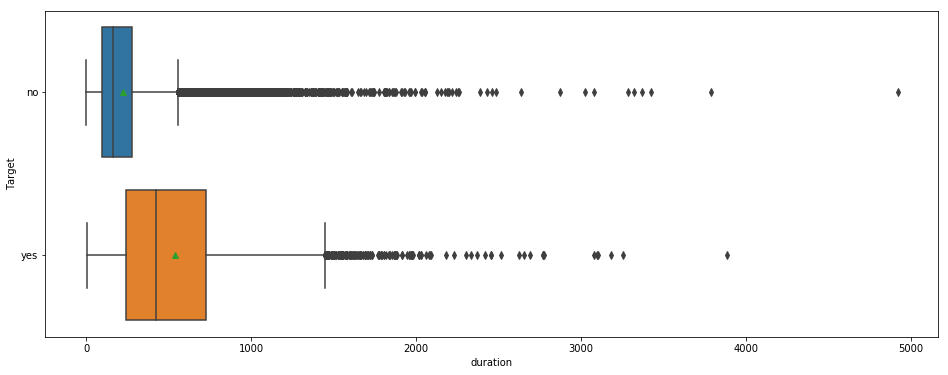

In [14]:
plt.figure(figsize = (16,6))
sns.boxplot(x = 'duration', y = 'Target', data = BankMktg_df, showmeans = True )

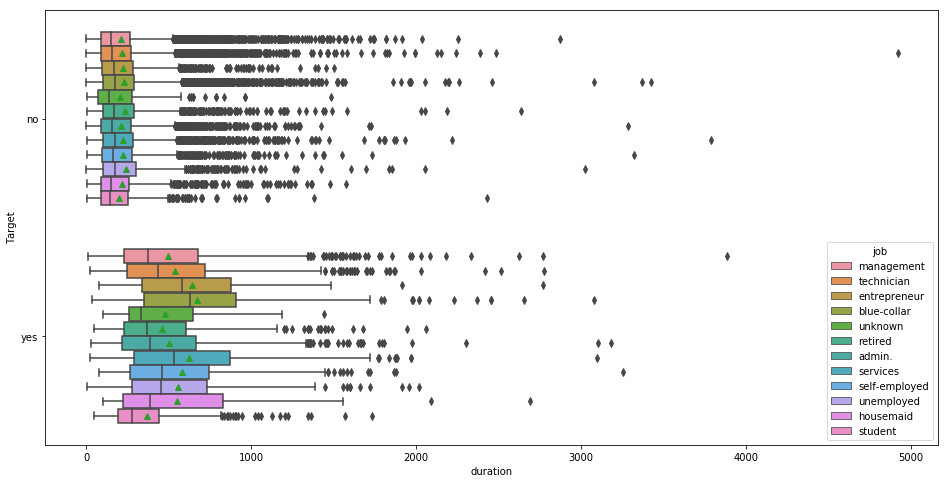

In [15]:
plt.figure(figsize = (16,8))
sns.boxplot(x = 'duration', y = 'Target', data = BankMktg_df, hue = 'job', showmeans = True )

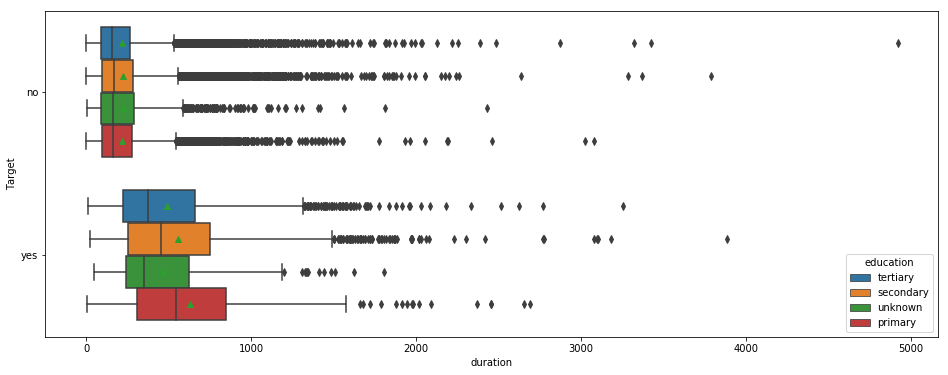

In [16]:
plt.figure(figsize = (16,6))
sns.boxplot(x = 'duration', y = 'Target', data = BankMktg_df, hue = 'education', showmeans = True )

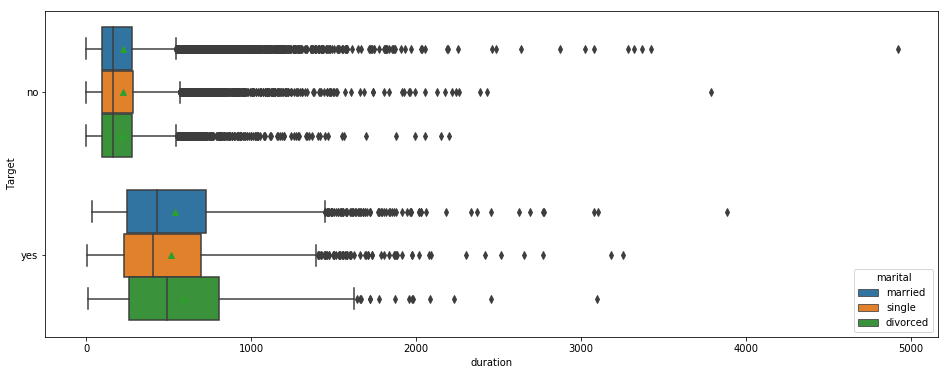

In [17]:
plt.figure(figsize = (16,6))
sns.boxplot(x = 'duration', y = 'Target', data = BankMktg_df, hue = 'marital', showmeans = True )

#### Observation:
1. There are lots of outliers in duration.
2. Duration is more for the customers who opted for term deposits, which shows it is postively correlated with the outcome.
3. If we look for the employees who are willing to take the long calls are blue-collar, entrepreneur, services sector & housemaid (in the sequence). This is for those who have opted for term deposits.
4. Customers who are divorced/widowed are willing to take long calls and opted for deposits with the bank.

##### Note: Another challenge here is, duration is not known until customer picks the call. Even though it is positively correlated, the duration may not be considered for building a predctive model as it is not known before hand.

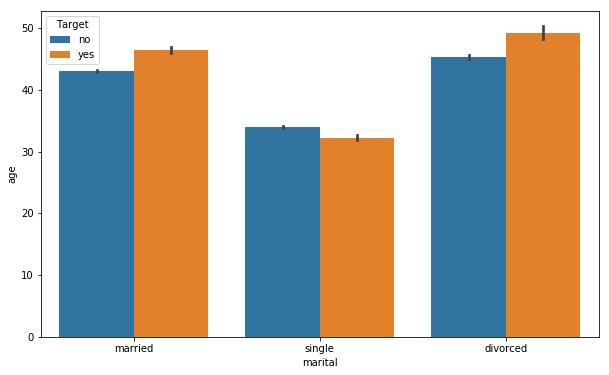

In [18]:
plt.figure(figsize = (10,6))
sns.barplot(y = 'age', x = 'marital', hue = 'Target', data = BankMktg_df)

In [19]:
BankMktg_df["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81, 18, 89, 84, 87, 92, 93, 88])

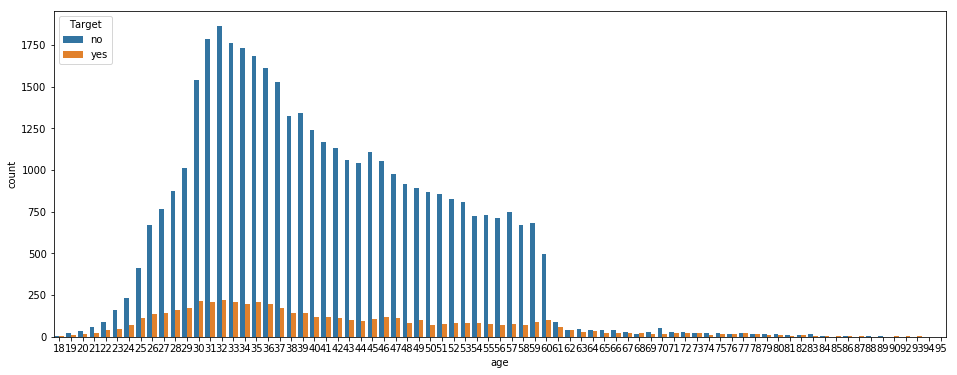

In [20]:
plt.figure(figsize = (16,6))
sns.categorical.countplot(x = 'age', data = BankMktg_df, hue = 'Target')

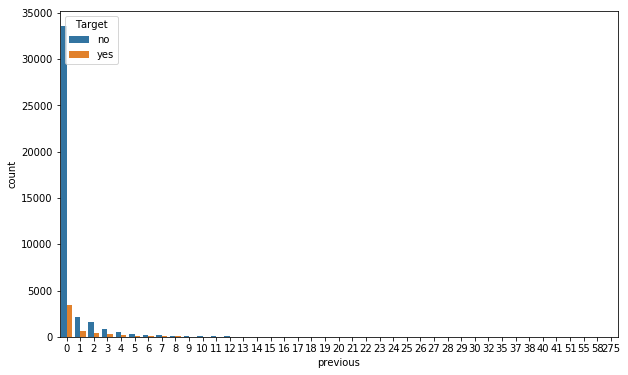

In [21]:
plt.figure(figsize = (10,6))
sns.categorical.countplot(x = 'previous', data = BankMktg_df, hue = 'Target')

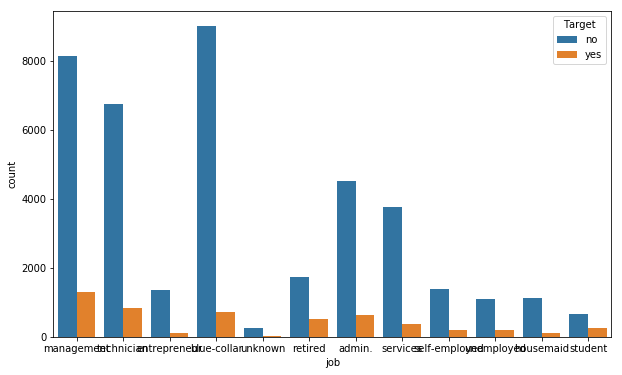

In [22]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'job',data = BankMktg_df, hue = 'Target')

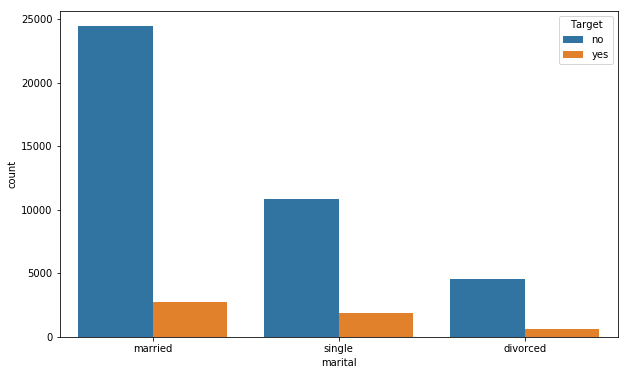

In [23]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'marital',data = BankMktg_df, hue = 'Target')

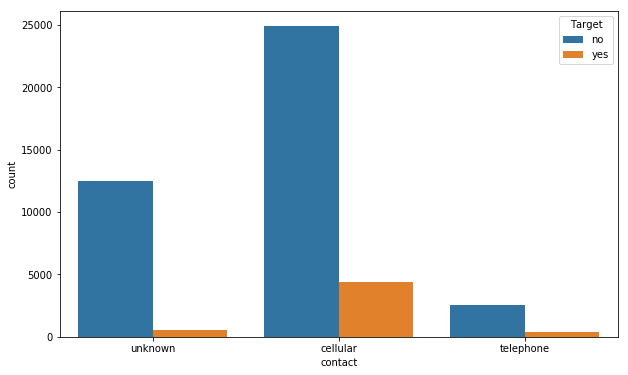

In [24]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'contact',data = BankMktg_df, hue = 'Target')

#### Observation:
1. Maximum customers are falling in the age range of 25-60 years.
2. Maximum customers opted for deposits are in the range of 25-45 years. There customers opted for deposting beyond 45 years as well, the proportion to the total cusomers falling in said is less.
3. By looking at the plot for 'previous', maximum number of customers were never contacted before the campaign and we also observe more subcribers for deposits from the same group. There is lot of scope for bank to improve the reachability to theor prospective/new deposits.
4. Blue-collar employees constitute majority of the customers. However, customers opting for deposits are more from management category employees followed by technician & blue-collar employee customers.
5. There are customers with various marital status. Maximum customers are with status 'married' and the maojority of the customers opted for deposits are also married.
6. Majority of the customers were contacted through cellphone and positive response is also more when contacted through cellular. WE can also see many data points with unknown medium of communication. It is recommended to have the cleand bata for building better model.

In [25]:
BankMktg_df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

##### Creating a copy of original dataframe and applying one-lable encoding to transform all the cateogrical values catgory codes

In [0]:
data_for_model = BankMktg_df
for feature in data_for_model.columns:
    if data_for_model[feature].dtype == 'object':
        data_for_model[feature] = pd.Categorical(data_for_model[feature]).codes

In [27]:
data_for_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null int8
marital      45211 non-null int8
education    45211 non-null int8
default      45211 non-null int8
balance      45211 non-null int64
housing      45211 non-null int8
loan         45211 non-null int8
contact      45211 non-null int8
day          45211 non-null int64
month        45211 non-null int8
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int8
Target       45211 non-null int8
dtypes: int64(7), int8(10)
memory usage: 2.8 MB


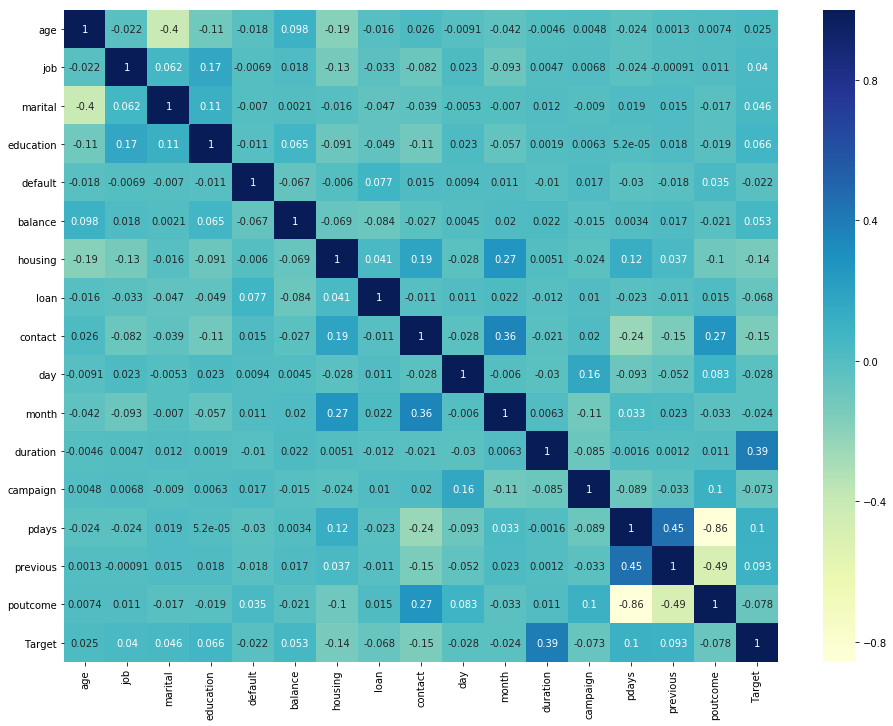

In [28]:
sns.heatmap(data_for_model.corr(), annot = True, cmap = 'YlGnBu')

### 5. Modelling and Evaluation of Algorithms

In [0]:
# Defining X,y & Splitting data into train & test splits & also freezing the random instance

X = data_for_model.drop(["Target", "duration"], axis = 1)
y = data_for_model["Target"]

test_size = 0.2
seed = 25

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# 5.1. Training with standard algorithms

## 5.1.1. Logistic Regression

In [30]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
LogReg_Predict = LogReg.predict(X_test)
LogReg_model_score = LogReg.score(X_test, y_test)
LogReg_model_score*100

88.5989162888422

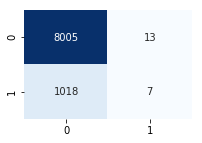

In [31]:
plt.figure(figsize = (3,2))
LRCM = confusion_matrix(y_test, LogReg_Predict)
sns.heatmap(LRCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.2. K-Nearest Neighbors

In [32]:
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(X_train, y_train)
KNN_Predict = KNN.predict(X_test)
KNN_model_score = KNN.score(X_test, y_test)
KNN_model_score*100

88.17870175826606

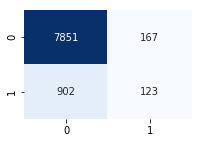

In [33]:
plt.figure(figsize = (3,2))
KNNCM = confusion_matrix(y_test, KNN_Predict)
sns.heatmap(KNNCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.2. Naive Bayes

In [34]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
GNB_Predict = GNB.predict(X_test)
GNB_model_score = GNB.score(X_test, y_test)
GNB_model_score*100

81.2783368351211

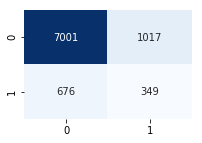

In [35]:
plt.figure(figsize = (3,2))
GNBCM = confusion_matrix(y_test, GNB_Predict)
sns.heatmap(GNBCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.3. SVM Classifier

In [36]:
SVMC = SVC(gamma = 0.025, C = 4)
SVMC.fit(X_train, y_train)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
SVMC_Predict = SVMC.predict(X_test)
SVMC_model_score = SVMC.score(X_test, y_test)
SVMC_model_score*100

87.19451509454827

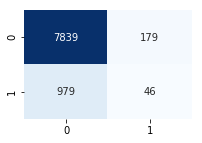

In [38]:
plt.figure(figsize = (3,2))
SVMCM = confusion_matrix(y_test, SVMC_Predict)
sns.heatmap(SVMCM, annot = True, fmt = 'd', cmap = 'Blues', cbar = False)

## 5.1.4. Decision Tree

In [39]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [40]:
predtrain = DTC.predict(X_train)
DTC.score(X_train, predtrain)

1.0

In [41]:
DTC_Predict = DTC.predict(X_test)
DTC_model_score = DTC.score(X_test, y_test)
DTC_model_score*100

83.32411810239965

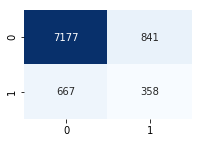

In [42]:
plt.figure(figsize = (3,2))
DTCCM = confusion_matrix(y_test, DTC_Predict)
sns.heatmap(DTCCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

In [43]:
feature_cols = X_train.columns
feat_importance = DTC.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, DTC.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
balance,0.235017
age,0.160378
day,0.115519
month,0.093708
job,0.070825
pdays,0.067859
campaign,0.061795
poutcome,0.059969
education,0.033930
housing,0.028835


We can see the decision tree is overfit when not restiricted with any parameters. On training set the predicted results are 100% where as on the test set, the accuracy is about 87.47%. Let's tune the parameters further and see how the Decision Tree predicts the target.

In [44]:
DTC2 = DecisionTreeClassifier(criterion='gini', max_depth=5,
                        min_samples_leaf=5, min_samples_split=5)
DTC2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [45]:
predtrain2 = DTC2.predict(X_train)
DTC2.score(X_train, predtrain)*100

89.39393939393939

In [46]:
DTC2_Predict = DTC2.predict(X_test)
DTC2_model_score = DTC2.score(X_test, y_test)
DTC2_model_score*100

89.38405396439235

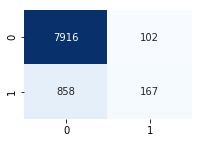

In [47]:
plt.figure(figsize = (3,2))
DTC2CM = confusion_matrix(y_test, DTC2_Predict)
sns.heatmap(DTC2CM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

In [48]:
feature_cols = X_train.columns
feat_importance = DTC2.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(feature_cols, DTC2.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.353919
month,0.213183
pdays,0.170369
age,0.161404
contact,0.059705
housing,0.013185
day,0.009865
balance,0.008511
marital,0.004174
previous,0.002982


After tuning the parameters, predictions on the training set and on the test set are almost same. The feature importance is also changed drastically post tuning the decision tree further.

In [0]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz
xvar = X_test

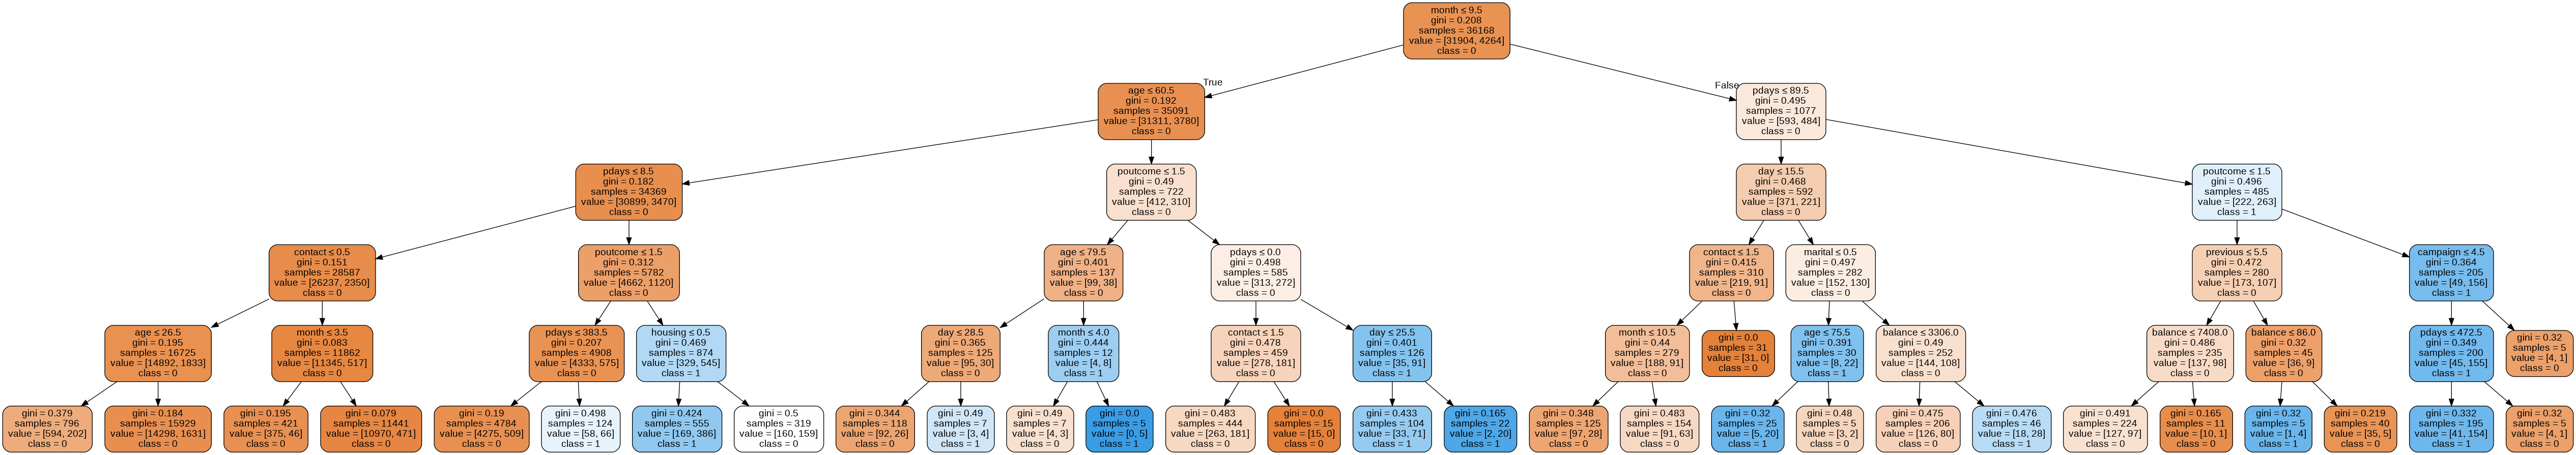

In [50]:
dot_data = StringIO()
export_graphviz(DTC2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BankMktg.png')
Image(graph.create_png())

## 5.1.5. Bagging Classifier

In [51]:
BGCL = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True)
BGCL.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=50,
                  n_jobs=None, oob_score=True, random_state=None, verbose=0,
                  warm_start=False)

In [52]:
BGCL_Predict = BGCL.predict(X_test)
BGCL_Score = accuracy_score(y_test, BGCL_Predict)*100
BGCL_Score

89.2734711931881

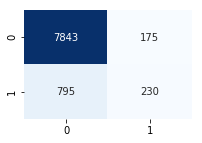

In [53]:
plt.figure(figsize = (3,2))
BGCLCM = confusion_matrix(y_test, BGCL_Predict)
sns.heatmap(BGCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.6. AdaBoost Classifier

In [54]:
ABCL = AdaBoostClassifier(n_estimators=100, random_state=25)
ABCL.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=25)

In [55]:
ABCL_Predict = ABCL.predict(X_test)
accuracy_score(y_test, ABCL_Predict)*100

89.08548048214088

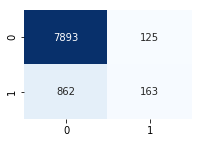

In [56]:
plt.figure(figsize = (3,2))
ABCLCM = confusion_matrix(y_test, ABCL_Predict)
sns.heatmap(ABCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.7. Gradient Boosting Classifier

In [57]:
GBCL = GradientBoostingClassifier(random_state = 25, n_estimators=1000)
GBCL.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='auto',
                           random_state=25, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [58]:
GBCL_Predict = GBCL.predict(X_test)
accuracy_score(y_test, GBCL_Predict)*100

89.4504036271149

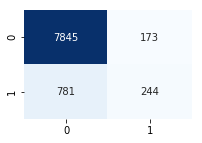

In [59]:
plt.figure(figsize = (3,2))
GBCLCM = confusion_matrix(y_test, GBCL_Predict)
sns.heatmap(GBCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 5.1.8. Random Forest Classifier

In [60]:
RFCL = RandomForestClassifier(n_estimators=100)
RFCL.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
RFCL_Predict = RFCL.predict(X_test)
accuracy_score(y_test, RFCL_Predict)*100

89.17394669910428

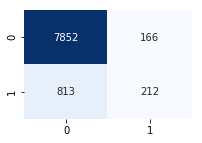

In [62]:
plt.figure(figsize = (3,2))
RFCLCM = confusion_matrix(y_test, RFCL_Predict)
sns.heatmap(RFCLCM, annot = True, fmt = 'd', cmap = 'Blues', cbar =  False)

## 6. Accuracy of the models & Generalizing the same with K-Fold

In [63]:
print("Accuracy Scores")
print("Logistic Regression:", LogReg.score(X_test, y_test)*100,"%")
print("K Nearest Neighbors:", KNN.score(X_test, y_test)*100,"%")
print("Naive Bayes", GNB.score(X_test, y_test)*100,"%")
print("Support Vector Machines:", SVMC.score(X_test, y_test)*100,"%")
print("Decision Tree Classifier 1:", DTC.score(X_test, y_test)*100,"%")
print("Decision Tree Classifier 2:", DTC2.score(X_test, y_test)*100,"%")
print("Bagging Classifier:", BGCL.score(X_test, y_test)*100,"%")
print("AdaBoost Classifier:", ABCL.score(X_test, y_test)*100,"%")
print("GradientBoosting Classifier:", GBCL.score(X_test, y_test)*100,"%")
print("RandomForest Classifier:", RFCL.score(X_test, y_test)*100,"%")

Accuracy Scores
Logistic Regression: 88.5989162888422 %
K Nearest Neighbors: 88.17870175826606 %
Naive Bayes 81.2783368351211 %
Support Vector Machines: 87.19451509454827 %
Decision Tree Classifier 1: 83.32411810239965 %
Decision Tree Classifier 2: 89.38405396439235 %
Bagging Classifier: 89.2734711931881 %
AdaBoost Classifier: 89.08548048214088 %
GradientBoosting Classifier: 89.4504036271149 %
RandomForest Classifier: 89.17394669910428 %


#### By looking at the accuracy scores, bagging & boosting classifiers are perforing with almost same accuracy levels around 90%. However, since the data is not balanced, we can't rely on the accuracy score. For datasets like these, we should check F1 score (Harmonic mean of both Precision & Recall scores)

In [64]:
print("Classification Reports")
print("Logistic Regression")
print(classification_report(y_test, LogReg_Predict))

print("K Nearest Neighbors")
print(classification_report(y_test, KNN_Predict))

print("Naive Bayes")
print(classification_report(y_test, GNB_Predict))

print("Support Vector Machine Classifier")
print(classification_report(y_test, SVMC_Predict))

print("Decision Tree Classifier 1")
print(classification_report(y_test, DTC_Predict))

print("Decision Tree Classifier 2")
print(classification_report(y_test, DTC2_Predict))

print("Bagging Classifier 1")
print(classification_report(y_test, BGCL_Predict))

print("AdaBoost Classifier")
print(classification_report(y_test, ABCL_Predict))

print("GradientBoost Classifier")
print(classification_report(y_test, GBCL_Predict))

print("RandomForest Classifier")
print(classification_report(y_test, RFCL_Predict))

Classification Reports
Logistic Regression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      8018
           1       0.35      0.01      0.01      1025

    accuracy                           0.89      9043
   macro avg       0.62      0.50      0.48      9043
weighted avg       0.83      0.89      0.83      9043

K Nearest Neighbors
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      8018
           1       0.42      0.12      0.19      1025

    accuracy                           0.88      9043
   macro avg       0.66      0.55      0.56      9043
weighted avg       0.84      0.88      0.85      9043

Naive Bayes
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      8018
           1       0.26      0.34      0.29      1025

    accuracy                           0.81      9043
   macro avg       0.58      0.61      0.59      9043

#### Observation:

1. Since bank is conudcting campaign for accepting deposits, the model built should ensure less misclassifying customers subscribing for deposits. 
2. The metrics that should be considered for class 1 should be minimum 'Precision' score & for class 0, minimum 'Recall' score. Model selected should attain a balance between the 2 scores. 
3. Of all the models tested, the following models tend to perform better in the order of preference:
    a. Support Vector Machine Classifier
    b. Logistic Regression
    c. K Nearest Neighbors
    d. AdaBoost Classifier
    e. Random Forest Classifier  

Accuracy Scores in 10-fold cross validation procedure
LogReg: 88.186308 (0.124690)
KNN: 87.014017 (0.121422)
GNB: 77.750569 (0.166063)
DTC: 73.160990 (0.127626)
BGCL: 83.061337 (0.131363)
ABCL: 88.166401 (0.126965)
GBCL: 87.980601 (0.123314)
RFCL: 86.668946 (0.122545)
SVM: 88.296903 (0.124564)


[Text(0, 0, 'LogReg'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'GNB'),
 Text(0, 0, 'DTC'),
 Text(0, 0, 'BGCL'),
 Text(0, 0, 'ABCL'),
 Text(0, 0, 'GBCL'),
 Text(0, 0, 'RFCL'),
 Text(0, 0, 'SVM')]

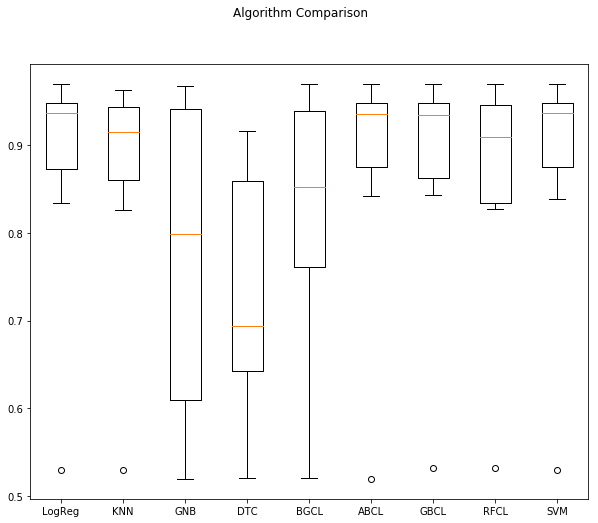

In [65]:
from sklearn import model_selection
models = []
models.append(('LogReg', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('BGCL', BaggingClassifier()))
models.append(('ABCL', AdaBoostClassifier()))
models.append(('GBCL', GradientBoostingClassifier()))
models.append(('RFCL', RandomForestClassifier()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print("Accuracy Scores in 10-fold cross validation procedure")
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std())
	print(msg)

[Text(0, 0, 'LogReg'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'GNB'),
 Text(0, 0, 'DTC'),
 Text(0, 0, 'BGCL'),
 Text(0, 0, 'ABCL'),
 Text(0, 0, 'GBCL'),
 Text(0, 0, 'RFCL'),
 Text(0, 0, 'SVM')]

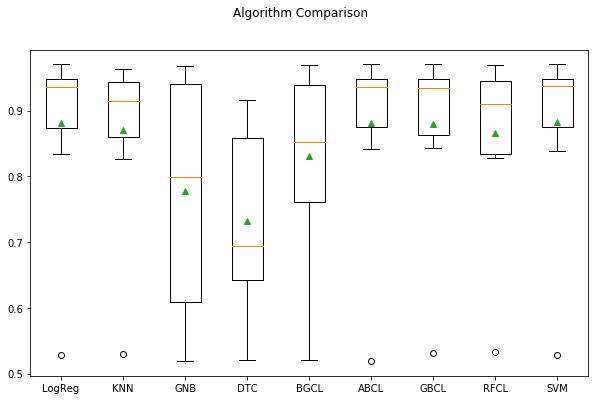

In [66]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (10,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, showmeans = True)
ax.set_xticklabels(names)

### Final Decision:

Even though 'duration' is highly correlated with outcome, the same is available only after contacting the customer. For buliding a prediction model, it is not advisable to consider the same as it is unknown. The most important features post removing duration would be (in the order of preference)

1. balance : Bank should focus on customers maintaining good average annual balance
2. age : Most of the customer opting for deposits are falling in the range 28 to 45 years. Focus more on these customers
3. month : For some reason, most of the deposits have come in the month of May. This is just an insight for the bank to look further into the same
4. job : Blue-collar employees constitute majority of the customers. However, customers opting for deposits are more from management category employees followed by technician & blue-collar employee customers
5. pdays : Bank shouldn't give more gap to call the customer. All the customer subscribed for deposits have passed days < 240. 
6. campaign & outcome: Bank should focus on customer who were contacted previously. History shows more subscribers from the previous campaign callers.

### Model Selection:

Logistic Regression, Support Vector Machines, Randome Forest Classifier, Adaboost classifer, Gradient boost classifier are consistent with accuracy rates ranging from 83% to 98% with almost same average accuracy rate of 88%. We can freeze the model selection with one of these.

We can observe the scores have been reduced a bit when Duration is removed from the predictive model. It anyways makes sense to build the predictive model with all the available features. Since duration is not availanle, it's better not consider to build the model.

#### Scores with Duration:
LogReg: 88.726012 (0.121285)
KNN: 87.449782 (0.114539)
GNB: 81.479835 (0.156130)
DTC: 79.701511 (0.106085)
BGCL: 86.213310 (0.110213)
ABCL: 88.425193 (0.110790)
GBCL: 88.741500 (0.116315)
RFCL: 87.677572 (0.115465)
SVM: 88.301327 (0.124568)

#### Scores without Duration:
LogReg: 88.186308 (0.124690)
KNN: 87.014017 (0.121422)
GNB: 77.750569 (0.166063)
DTC: 73.160990 (0.127626)
BGCL: 83.061337 (0.131363)
ABCL: 88.166401 (0.126965)
GBCL: 87.980601 (0.123314)
RFCL: 86.668946 (0.122545)
SVM: 88.296903 (0.124564)
